In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity

def ensure_binary_mask(mask, threshold=0.5):
    """
    Ensures a mask is binary.
    """
    mask = np.asarray(mask)
    if mask.max() > 1:  # Normalize if necessary
        mask = rescale_intensity(mask, in_range='image', out_range=(0, 1))
    if len(mask.shape) == 3:  # RGB to grayscale
        mask = rgb2gray(mask)
    return (mask > threshold).astype(np.uint8)

# Paths to segmentation outputs
sam_path = "/content/drive/MyDrive/yolov11/dataset/sam_dataset_BINARY/test/"
unet_path = "/content/drive/MyDrive/yolov11/dataset/unet_dataset/images/test"
edge_path = "/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images/test/"
output_path = "/content/drive/MyDrive/ensemble_masks/test"

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Get the list of mask files (assuming filenames match across models)
sam_files = sorted(os.listdir(sam_path))
unet_files = sorted(os.listdir(unet_path))
edge_files = sorted(os.listdir(edge_path))

for sam_file, unet_file, edge_file in zip(sam_files, unet_files, edge_files):
    # Read masks
    sam_mask = ensure_binary_mask(imread(os.path.join(sam_path, sam_file)))
    unet_mask = ensure_binary_mask(imread(os.path.join(unet_path, unet_file)))
    edge_mask = ensure_binary_mask(imread(os.path.join(edge_path, edge_file)))

    # Ensemble using majority voting
    combined_mask = (sam_mask + unet_mask + edge_mask) >= 2  # Majority vote (2/3 models agree)

    # Save the ensemble mask
    combined_mask_path = os.path.join(output_path, sam_file)  # Save with the same name as SAM mask
    imsave(combined_mask_path, (combined_mask * 255).astype(np.uint8))  # Save as binary image

    print(f"Ensembled mask saved: {combined_mask_path}")


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img239.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img239.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img244.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img244.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img249.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img249.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img253.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img253.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/01_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/01_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img03.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img155.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img206.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img206.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img213.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img213.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img220.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img220.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/02_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/02_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img176.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/03_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/03_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/04_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/04_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img205.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img205.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img228.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img228.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img239.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img239.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img240.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img240.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img250.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img250.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img257.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img257.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img263.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img263.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img274.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img274.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img292.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img292.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img296.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img296.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img299.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img299.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img309.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img309.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img320.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img320.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img323.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img323.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img330.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img330.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img340.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img340.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img343.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img343.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img347.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img347.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img354.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img354.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img356.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img356.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img357.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img357.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/05_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/05_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/06_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/06_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/07_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/07_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img122.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img176.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img213.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img213.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img233.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img233.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img268.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img268.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img270.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img270.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img285.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img32.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img321.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img334.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img334.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img342.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img342.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img364.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img364.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img365.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img365.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img374.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img374.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img384.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img384.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img385.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img385.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img391.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img391.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img402.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img402.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img406.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img406.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img418.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img418.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img429.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img482.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img486.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img486.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img50.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img503.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img523.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img523.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img531.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img531.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img547.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img547.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img551.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img551.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img558.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img558.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img561.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img561.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img571.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img571.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img573.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img573.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img590.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img590.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img591.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img591.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img598.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img598.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img606.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img606.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img608.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img608.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img636.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img636.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img645.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img645.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img647.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img647.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img664.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img664.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img677.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img683.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img683.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img686.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img686.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img690.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img698.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img698.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img701.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img701.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img710.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/08_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/08_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img10.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img107.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img110.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img138.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img74.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/09_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/09_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img207.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img207.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img214.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img214.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img225.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img225.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img226.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img226.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img240.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img240.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img267.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img267.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img268.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img268.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img276.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img276.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img280.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img280.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img295.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img295.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img304.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img304.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img310.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img310.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img330.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img330.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img366.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img366.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img373.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img373.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img378.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img378.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img383.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img383.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img387.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img387.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img391.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img391.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img396.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img396.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img398.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img398.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img413.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img413.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img426.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img426.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img45.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/test/10_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/test/10_img91.png is a low contrast image
  return func(*args, **kwargs)


In [ ]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity

def ensure_binary_mask(mask, threshold=0.5):
    """
    Ensures a mask is binary.
    """
    mask = np.asarray(mask)
    if mask.max() > 1:  # Normalize if necessary
        mask = rescale_intensity(mask, in_range='image', out_range=(0, 1))
    if len(mask.shape) == 3:  # RGB to grayscale
        mask = rgb2gray(mask)
    return (mask > threshold).astype(np.uint8)

# Paths to segmentation outputs
base_sam_path = "/content/drive/MyDrive/yolov11/dataset/sam_dataset_BINARY"
base_unet_path = "/content/drive/MyDrive/yolov11/dataset/unet_dataset/images"
base_edge_path = "/content/drive/MyDrive/yolov9/edge_based_yolo_dataset/images"
output_base_path = "/content/drive/MyDrive/ensemble_masks"

# Ensure the output directory exists
os.makedirs(output_base_path, exist_ok=True)

# Folders to process (skipping test)
subfolders = ["train", "val"]

# Process each subfolder
for subfolder in subfolders:
    print(f"Processing {subfolder} images...")
    sam_path = os.path.join(base_sam_path, subfolder)
    unet_path = os.path.join(base_unet_path, subfolder)
    edge_path = os.path.join(base_edge_path, subfolder)
    output_path = os.path.join(output_base_path, subfolder)

    # Ensure the output directory exists for the subfolder
    os.makedirs(output_path, exist_ok=True)

    # Get the list of mask files (assuming filenames match across models)
    sam_files = sorted(os.listdir(sam_path))
    unet_files = sorted(os.listdir(unet_path))
    edge_files = sorted(os.listdir(edge_path))

    for sam_file, unet_file, edge_file in zip(sam_files, unet_files, edge_files):
        # Read masks
        sam_mask = ensure_binary_mask(imread(os.path.join(sam_path, sam_file)))
        unet_mask = ensure_binary_mask(imread(os.path.join(unet_path, unet_file)))
        edge_mask = ensure_binary_mask(imread(os.path.join(edge_path, edge_file)))

        # Ensemble using majority voting
        combined_mask = (sam_mask + unet_mask + edge_mask) >= 2  # Majority vote (2/3 models agree)

        # Save the ensemble mask
        combined_mask_path = os.path.join(output_path, sam_file)  # Save with the same name as SAM mask
        imsave(combined_mask_path, (combined_mask * 255).astype(np.uint8))  # Save as binary image

        print(f"Ensembled mask saved: {combined_mask_path}")

print("Ensembling completed for train and val subsets!")


Processing train images...


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img175.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img202.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img202.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img205.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img205.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img206.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img206.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img207.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img207.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img208.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img208.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img209.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img209.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img210.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img210.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img211.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img211.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img212.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img212.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img215.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img215.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img216.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img216.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img217.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img217.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img219.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img219.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img220.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img220.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img221.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img221.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img222.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img222.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img223.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img223.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img224.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img224.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img225.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img225.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img226.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img226.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img228.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img228.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img229.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img229.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img230.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img230.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img231.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img231.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img232.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img232.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img233.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img233.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img235.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img235.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img236.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img236.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img237.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img237.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img238.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img238.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img240.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img240.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img241.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img241.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img243.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img243.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img245.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img245.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img247.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img247.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img248.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img248.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img251.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img251.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img252.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img252.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img255.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img255.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img256.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img256.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img257.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img257.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img258.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img258.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img259.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img259.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img260.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img260.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img261.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img261.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img263.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img263.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img264.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img264.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img265.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img265.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img266.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img266.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img267.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img267.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img269.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img269.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img270.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img270.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img271.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img271.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img273.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img273.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img274.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img274.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img275.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img275.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img276.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img276.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img277.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img277.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img278.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img278.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img279.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img279.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/01_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/01_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img09.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img105.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img115.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img116.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img145.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img147.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img175.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img203.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img203.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img204.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img204.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img205.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img205.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img209.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img209.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img211.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img211.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img212.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img212.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img216.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img216.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img217.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img217.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img218.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img218.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img22.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img24.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img26.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img41.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img45.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img50.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img54.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img89.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/02_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img95.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img98.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/02_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img175.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/03_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/03_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/04_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/04_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img137.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img175.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img203.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img203.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img204.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img204.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img207.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img207.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img210.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img210.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img211.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img211.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img212.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img212.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img213.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img213.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img214.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img214.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img215.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img215.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img216.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img216.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img217.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img217.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img218.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img218.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img219.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img219.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img221.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img221.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img222.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img222.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img223.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img223.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img224.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img224.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img225.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img225.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img226.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img226.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img227.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img227.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img229.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img229.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img230.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img230.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img232.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img232.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img233.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img233.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img234.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img234.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img235.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img235.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img236.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img236.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img237.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img237.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img238.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img238.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img242.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img242.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img243.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img243.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img244.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img244.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img246.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img246.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img247.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img247.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img248.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img248.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img249.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img249.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img251.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img251.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img252.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img252.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img253.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img253.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img254.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img254.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img255.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img255.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img256.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img256.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img258.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img258.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img259.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img259.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img260.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img260.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img262.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img262.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img264.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img264.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img265.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img265.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img266.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img266.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img268.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img268.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img269.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img269.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img270.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img270.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img272.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img272.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img275.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img275.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img276.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img276.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img277.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img277.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img279.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img279.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img280.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img280.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img281.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img281.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img282.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img282.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img283.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img283.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img285.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img285.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img286.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img286.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img287.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img287.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img288.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img288.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img291.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img291.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img294.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img294.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img295.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img295.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img297.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img297.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img298.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img298.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img300.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img300.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img301.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img301.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img303.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img303.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img304.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img304.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img306.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img306.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img308.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img308.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img310.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img310.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img311.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img311.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img312.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img312.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img314.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img314.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img315.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img315.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img316.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img316.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img317.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img317.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img318.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img318.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img319.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img319.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img324.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img324.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img327.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img327.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img328.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img328.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img332.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img332.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img334.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img334.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img335.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img335.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img336.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img336.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img337.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img337.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img338.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img338.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img339.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img339.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img341.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img341.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img342.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img342.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img345.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img345.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img348.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img348.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img349.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img349.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img350.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img350.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img351.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img351.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img352.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img352.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img353.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img353.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img355.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img355.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img358.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img358.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img359.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img359.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img360.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img360.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img363.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img363.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img364.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img364.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img365.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img365.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img366.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img366.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img367.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img367.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img368.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img368.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img369.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img369.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img370.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img370.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img371.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img371.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img372.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img372.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img373.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img373.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img374.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img374.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img375.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img375.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img377.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img377.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img379.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img379.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img380.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img380.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img381.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img381.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img382.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img382.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img383.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img383.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img384.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img384.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img386.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img386.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img387.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img387.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img388.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img388.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img389.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img389.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img390.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img390.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img391.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img391.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img392.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img392.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img393.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img393.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img394.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img394.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img395.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img395.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img396.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img396.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img397.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img397.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img400.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img400.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img402.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img402.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img404.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img404.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img405.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img405.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img406.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img406.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/05_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/05_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img134.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/06_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/06_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/07_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/07_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img113.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img113.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img134.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img134.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img136.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img138.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img175.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img184.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img184.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img202.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img202.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img203.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img203.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img204.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img204.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img206.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img207.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img207.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img208.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img208.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img209.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img209.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img210.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img210.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img211.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img211.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img212.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img212.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img214.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img214.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img215.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img215.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img216.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img216.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img217.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img217.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img218.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img218.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img219.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img220.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img220.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img221.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img222.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img223.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img224.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img224.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img226.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img226.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img228.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img228.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img229.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img229.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img230.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img230.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img231.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img231.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img232.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img232.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img234.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img234.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img235.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img235.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img237.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img237.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img238.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img238.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img239.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img239.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img240.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img240.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img241.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img241.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img242.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img242.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img244.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img244.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img245.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img245.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img246.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img246.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img247.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img247.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img249.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img249.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img250.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img250.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img251.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img251.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img252.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img252.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img254.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img254.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img255.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img255.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img257.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img257.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img258.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img258.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img259.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img259.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img260.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img260.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img261.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img261.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img262.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img262.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img263.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img263.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img264.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img264.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img265.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img265.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img266.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img266.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img267.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img267.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img269.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img269.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img271.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img271.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img274.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img274.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img275.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img275.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img277.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img277.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img278.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img278.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img279.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img279.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img280.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img280.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img282.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img282.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img283.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img284.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img286.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img288.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img289.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img29.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img290.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img292.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img293.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img294.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img296.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img297.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img299.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img30.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img300.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img301.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img302.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img303.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img304.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img305.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img306.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img308.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img308.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img310.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img310.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img315.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img315.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img317.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img317.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img318.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img318.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img319.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img319.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img320.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img322.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img323.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img324.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img324.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img325.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img326.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img326.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img328.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img329.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img332.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img332.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img336.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img336.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img337.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img337.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img338.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img338.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img339.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img339.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img340.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img340.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img341.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img341.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img344.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img344.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img345.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img345.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img346.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img346.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img347.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img347.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img348.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img348.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img351.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img351.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img352.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img352.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img353.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img354.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img355.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img355.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img356.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img357.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img357.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img358.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img359.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img359.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img360.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img360.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img361.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img361.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img363.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img363.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img367.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img368.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img368.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img369.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img369.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img370.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img370.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img372.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img372.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img373.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img373.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img375.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img375.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img376.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img376.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img379.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img379.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img380.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img380.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img381.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img381.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img382.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img382.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img383.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img383.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img386.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img386.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img387.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img387.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img388.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img388.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img389.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img389.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img390.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img390.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img392.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img392.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img393.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img393.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img394.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img394.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img396.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img396.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img397.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img397.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img398.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img398.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img399.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img399.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img400.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img400.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img403.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img403.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img404.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img404.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img405.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img405.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img407.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img407.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img408.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img408.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img409.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img409.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img411.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img411.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img412.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img412.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img413.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img413.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img414.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img414.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img417.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img417.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img419.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img419.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img420.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img420.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img421.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img421.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img422.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img422.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img423.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img423.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img424.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img425.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img426.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img426.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img427.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img428.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img43.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img430.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img435.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img435.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img438.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img439.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img439.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img44.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img440.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img441.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img442.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img442.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img443.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img444.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img444.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img445.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img445.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img446.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img447.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img448.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img448.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img449.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img449.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img450.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img450.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img451.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img451.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img452.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img452.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img453.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img453.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img454.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img454.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img455.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img455.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img458.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img459.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img46.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img461.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img462.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img462.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img466.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img466.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img467.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img467.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img468.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img468.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img47.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img472.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img473.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img473.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img475.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img475.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img476.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img480.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img480.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img481.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img483.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img484.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img485.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img487.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img487.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img489.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img49.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img490.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img491.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img492.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img493.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img494.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img495.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img495.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img496.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img496.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img498.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img499.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img500.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img502.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img502.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img504.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img505.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img505.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img506.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img506.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img509.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img509.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img510.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img510.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img511.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img511.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img512.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img512.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img514.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img514.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img515.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img515.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img516.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img516.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img517.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img517.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img518.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img518.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img52.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img520.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img521.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img521.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img524.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img524.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img526.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img526.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img527.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img527.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img529.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img529.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img530.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img530.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img532.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img533.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img533.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img534.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img534.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img535.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img535.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img536.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img536.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img537.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img537.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img538.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img538.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img539.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img539.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img540.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img540.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img541.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img541.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img542.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img542.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img543.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img543.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img544.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img544.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img545.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img545.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img546.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img546.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img548.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img548.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img549.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img549.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img553.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img553.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img555.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img555.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img557.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img557.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img559.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img559.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img560.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img560.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img562.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img562.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img564.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img564.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img565.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img565.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img566.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img566.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img567.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img567.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img568.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img568.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img572.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img572.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img575.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img575.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img576.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img576.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img577.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img577.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img578.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img578.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img579.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img579.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img580.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img580.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img582.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img582.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img583.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img583.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img585.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img585.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img586.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img586.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img587.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img587.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img588.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img588.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img589.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img589.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img592.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img592.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img593.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img593.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img594.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img594.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img596.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img596.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img597.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img597.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img599.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img599.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img601.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img601.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img602.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img602.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img603.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img603.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img605.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img605.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img607.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img607.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img609.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img609.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img610.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img610.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img611.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img611.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img612.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img612.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img613.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img613.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img616.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img616.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img617.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img617.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img618.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img618.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img619.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img619.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img620.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img620.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img621.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img621.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img623.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img623.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img624.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img624.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img625.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img625.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img629.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img629.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img630.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img630.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img632.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img633.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img634.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img635.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img635.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img638.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img638.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img639.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img639.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img64.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img640.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img641.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img641.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img642.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img642.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img643.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img643.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img644.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img644.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img646.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img646.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img649.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img649.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img651.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img651.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img652.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img652.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img653.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img653.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img654.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img654.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img655.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img655.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img656.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img656.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img657.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img657.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img658.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img658.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img659.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img659.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img660.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img660.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img661.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img661.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img662.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img665.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img665.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img666.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img666.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img668.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img67.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img671.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img672.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img672.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img673.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img674.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img675.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img675.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img676.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img676.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img678.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img681.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img681.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img682.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img682.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img684.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img684.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img685.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img685.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img687.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img687.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img688.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img688.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img689.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img689.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img693.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img693.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img694.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img695.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img695.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img696.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img696.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img697.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img697.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img699.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img699.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img700.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img700.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img702.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img702.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img704.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img704.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img705.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img705.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img706.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img706.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img707.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img707.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img708.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img708.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img709.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img709.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img711.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img711.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img712.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img712.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img714.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img714.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img716.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img716.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img717.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img717.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img719.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img719.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img720.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img720.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img721.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img721.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img722.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img722.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img723.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img723.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img724.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img724.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img725.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img725.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img726.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img726.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img727.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img727.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img728.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img728.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img730.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img730.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img731.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img731.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img732.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img732.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img733.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img733.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img735.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img735.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img737.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img737.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img738.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img738.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img740.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img740.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img741.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img741.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img742.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img742.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img743.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img743.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img744.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img744.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img746.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img746.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img747.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img747.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img748.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img748.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img750.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img750.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img751.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img751.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img752.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img752.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img753.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img753.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img755.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img755.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img756.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img756.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img757.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img757.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img758.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img758.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img759.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img759.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/08_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/08_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img08.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img100.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img105.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img106.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img108.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img109.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img111.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img112.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img113.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img114.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img116.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img118.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img12.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img120.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img121.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img122.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img126.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img13.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img130.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img131.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img134.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img135.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img137.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img137.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img140.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img141.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img142.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img143.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img146.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img15.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img150.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img151.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img72.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img76.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/09_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img97.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/09_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img02.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img02.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img04.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img04.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img08.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img08.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img101.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img101.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img105.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img105.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img109.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img117.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img117.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img119.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img119.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img121.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img141.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img141.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img147.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img157.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img157.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img161.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img161.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img163.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img163.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img167.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img167.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img17.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img17.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img172.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img172.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img175.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img175.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img177.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img177.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img18.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img18.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img180.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img180.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img181.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img181.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img187.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img187.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img190.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img190.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img193.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img193.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img198.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img198.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img201.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img201.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img202.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img202.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img203.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img203.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img204.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img204.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img206.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img206.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img208.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img208.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img209.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img209.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img210.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img210.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img211.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img211.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img213.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img213.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img216.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img216.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img219.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img219.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img222.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img222.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img223.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img223.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img224.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img224.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img227.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img227.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img228.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img228.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img229.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img229.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img231.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img231.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img232.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img232.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img233.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img233.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img234.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img234.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img235.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img235.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img238.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img238.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img239.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img239.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img241.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img241.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img242.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img242.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img243.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img243.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img244.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img244.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img245.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img245.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img246.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img246.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img247.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img247.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img248.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img248.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img249.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img249.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img251.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img251.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img252.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img252.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img253.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img253.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img255.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img255.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img256.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img256.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img258.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img258.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img259.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img259.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img261.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img261.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img264.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img264.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img265.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img265.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img270.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img270.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img271.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img271.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img272.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img272.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img274.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img274.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img275.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img275.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img278.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img278.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img281.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img281.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img282.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img282.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img283.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img283.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img284.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img284.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img286.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img286.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img288.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img288.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img289.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img289.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img290.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img290.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img291.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img291.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img292.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img292.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img294.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img294.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img297.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img297.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img298.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img298.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img299.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img299.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img300.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img300.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img301.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img301.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img302.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img302.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img303.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img303.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img305.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img305.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img307.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img307.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img309.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img309.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img31.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img311.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img311.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img312.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img312.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img313.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img313.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img314.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img314.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img315.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img315.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img316.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img316.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img317.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img317.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img319.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img319.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img320.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img320.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img321.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img321.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img322.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img322.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img323.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img323.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img324.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img324.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img325.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img325.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img326.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img326.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img327.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img327.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img329.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img329.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img332.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img332.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img333.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img333.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img334.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img334.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img335.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img335.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img336.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img336.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img337.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img337.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img338.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img338.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img339.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img339.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img340.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img340.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img341.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img341.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img343.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img343.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img344.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img344.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img345.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img345.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img348.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img348.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img35.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img35.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img351.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img351.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img352.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img352.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img353.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img353.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img354.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img354.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img356.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img356.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img357.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img357.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img359.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img359.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img360.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img360.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img361.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img361.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img362.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img362.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img363.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img363.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img365.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img365.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img367.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img367.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img369.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img369.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img374.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img374.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img375.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img375.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img376.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img376.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img377.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img377.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img380.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img380.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img381.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img381.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img382.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img382.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img384.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img384.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img385.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img385.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img386.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img386.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img388.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img388.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img389.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img389.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img39.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img392.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img392.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img393.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img393.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img394.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img394.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img395.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img395.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img397.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img397.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img40.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img40.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img400.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img400.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img402.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img402.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img403.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img403.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img405.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img405.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img406.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img406.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img408.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img408.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img409.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img409.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img411.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img411.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img414.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img414.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img415.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img415.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img416.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img416.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img419.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img419.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img420.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img420.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img421.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img421.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img422.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img422.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img423.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img423.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img424.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img424.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img427.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img427.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img428.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img428.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img429.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img429.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img431.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img431.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img432.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img432.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img433.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img433.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img434.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img434.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img435.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img435.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img436.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img436.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img437.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img437.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img439.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img439.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img440.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img440.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img441.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img441.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img442.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img442.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img444.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img444.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img445.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img445.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img446.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img446.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img447.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img447.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img448.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img448.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img449.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img449.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img450.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img450.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img451.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img451.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img452.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img452.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img455.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img455.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img456.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img456.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img457.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img457.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img458.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img458.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img459.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img459.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img460.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img460.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img57.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img57.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img76.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img76.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/train/10_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/train/10_img97.png
Processing val images...


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img132.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img132.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img136.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img136.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img160.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img160.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img176.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img182.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img182.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img203.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img203.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img204.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img204.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img213.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img213.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img214.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img214.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img218.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img218.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img227.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img227.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img234.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img234.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img24.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img24.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img242.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img242.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img246.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img246.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img250.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img250.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img254.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img254.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img262.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img262.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img268.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img268.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img272.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img272.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img280.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img280.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img90.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img90.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/01_img99.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/01_img99.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img106.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img106.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img108.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img108.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img109.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img109.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img126.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img126.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img139.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img154.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img154.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img162.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img162.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img194.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img194.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img202.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img202.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img207.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img207.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img208.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img208.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img21.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img21.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img210.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img210.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img214.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img214.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img215.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img215.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img219.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img219.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img221.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img221.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img34.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img34.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img39.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img39.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img44.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img48.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img55.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img55.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img56.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img56.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img61.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img61.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img63.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img63.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img70.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img70.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img78.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img78.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/02_img97.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/02_img97.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img11.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img116.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img116.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img125.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img125.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img149.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img149.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img151.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img151.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img178.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img178.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img183.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img183.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img191.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img191.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img192.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img192.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img52.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img52.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/03_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/03_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img102.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img114.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img114.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img122.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img122.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img13.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img13.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img133.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img133.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img75.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img75.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img81.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img81.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img93.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img93.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/04_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/04_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img03.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img03.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img07.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img07.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img10.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img10.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img111.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img111.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img12.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img12.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img130.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img130.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img156.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img156.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img16.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img16.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img176.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img188.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img188.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img197.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img197.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img202.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img202.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img206.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img206.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img208.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img208.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img209.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img209.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img220.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img220.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img231.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img231.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img241.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img241.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img245.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img245.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img25.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img25.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img261.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img261.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img267.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img267.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img271.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img271.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img273.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img273.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img278.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img278.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img284.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img284.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img289.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img289.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img290.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img290.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img293.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img293.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img302.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img302.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img305.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img305.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img307.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img307.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img313.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img313.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img321.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img321.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img322.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img322.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img325.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img325.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img326.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img326.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img329.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img329.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img331.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img331.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img333.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img333.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img344.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img344.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img346.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img346.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img361.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img361.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img362.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img362.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img376.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img376.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img378.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img378.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img385.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img385.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img398.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img398.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img399.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img399.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img401.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img401.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img403.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img403.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img53.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img53.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img62.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img62.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img64.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img64.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img66.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img66.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img71.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img71.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img80.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img80.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/05_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/05_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img110.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img110.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img112.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img112.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img115.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img115.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img138.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img138.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img142.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img142.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img143.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img143.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img20.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img20.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img29.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img29.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img47.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img47.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img69.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img69.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img77.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img77.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/06_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/06_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img01.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img01.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img06.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img06.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img103.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img103.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img104.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img15.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img15.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img45.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img45.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img50.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img50.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img74.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img74.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img85.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img85.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img88.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img88.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img91.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img91.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/07_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/07_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img05.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img05.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img09.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img104.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img104.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img121.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img128.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img128.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img131.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img131.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img140.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img140.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img144.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img144.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img159.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img159.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img164.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img164.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img165.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img165.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img169.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img169.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img170.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img170.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img173.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img173.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img174.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img174.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img179.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img179.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img185.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img185.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img186.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img186.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img189.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img189.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img199.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img199.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img200.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img200.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img205.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img205.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img225.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img225.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img227.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img227.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img23.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img23.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img236.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img236.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img243.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img243.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img248.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img248.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img253.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img253.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img256.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img256.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img26.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img26.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img272.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img272.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img273.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img273.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img276.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img276.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img281.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img281.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img287.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img291.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img295.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img298.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img298.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img307.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img309.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img31.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img31.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img311.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img312.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img312.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img313.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img314.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img316.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img316.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img327.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img33.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img33.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img330.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img330.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img331.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img331.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img333.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img335.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img343.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img343.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img349.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img349.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img350.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img350.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img36.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img36.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img362.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img362.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img366.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img366.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img37.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img37.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img371.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img371.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img377.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img377.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img378.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img378.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img38.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img38.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img395.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img395.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img401.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img401.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img410.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img410.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img415.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img415.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img416.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img416.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img431.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img432.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img433.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img433.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img434.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img436.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img436.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img437.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img456.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img457.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img460.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img463.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img464.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img464.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img465.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img469.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img469.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img470.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img471.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img474.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img474.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img477.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img477.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img478.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img478.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img479.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img479.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img488.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img497.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img497.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img501.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img507.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img507.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img508.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img508.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img513.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img513.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img519.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img519.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img522.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img522.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img525.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img525.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img528.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img528.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img550.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img550.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img552.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img552.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img554.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img554.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img556.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img556.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img563.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img563.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img569.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img569.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img570.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img570.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img574.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img574.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img581.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img581.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img584.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img584.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img595.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img595.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img600.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img600.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img604.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img604.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img614.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img614.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img615.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img615.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img622.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img622.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img626.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img626.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img627.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img627.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img628.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img631.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img631.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img637.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img637.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img648.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img648.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img65.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img65.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img650.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img650.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img663.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img663.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img667.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img667.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img669.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img670.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img679.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img679.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img680.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img680.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img691.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img691.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img692.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img692.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img703.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img703.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img713.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img713.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img715.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img715.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img718.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img718.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img72.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img72.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img729.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img729.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img734.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img734.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img736.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img736.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img739.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img739.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img745.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img745.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img749.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img749.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img754.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img754.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img79.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img79.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img82.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img82.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img83.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img83.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/08_img95.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/08_img95.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img09.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img09.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img101.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img102.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img11.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img11.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img117.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img123.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img125.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img129.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img132.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img133.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img139.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img14.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img144.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img145.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img147.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img152.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img152.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img155.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img155.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img158.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img158.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img166.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img166.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img22.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img22.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img27.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img27.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img28.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img28.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img30.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img30.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img32.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img32.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img43.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img43.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img48.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img48.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img49.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img49.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img58.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img58.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img59.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img59.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img68.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img68.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img73.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img73.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img92.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img92.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img94.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img94.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/09_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/09_img98.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img100.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img100.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img107.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img107.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img118.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img118.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img120.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img120.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img123.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img123.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img124.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img124.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img127.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img127.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img129.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img129.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img135.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img135.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img14.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img14.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img145.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img145.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img146.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img146.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img148.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img148.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img150.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img150.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img153.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img153.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img168.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img168.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img171.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img171.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img176.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img176.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img19.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img19.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img195.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img195.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img196.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img196.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img205.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img205.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img212.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img212.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img215.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img215.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img217.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img217.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img218.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img218.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img220.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img220.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img221.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img221.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img230.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img230.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img236.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img236.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img237.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img237.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img250.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img250.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img254.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img254.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img257.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img257.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img260.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img260.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img262.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img262.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img263.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img263.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img266.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img266.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img269.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img269.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img273.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img273.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img277.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img277.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img279.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img279.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img285.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img285.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img287.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img287.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img293.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img293.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img296.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img296.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img306.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img306.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img308.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img308.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img318.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img318.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img328.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img328.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img331.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img331.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img342.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img342.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img346.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img346.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img347.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img347.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img349.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img349.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img350.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img350.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img355.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img355.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img358.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img358.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img364.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img364.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img368.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img368.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img370.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img370.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img371.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img371.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img372.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img372.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img379.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img379.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img390.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img390.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img399.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img399.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img401.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img401.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img404.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img404.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img407.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img407.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img41.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img41.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img410.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img410.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img412.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img412.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img417.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img417.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img418.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img418.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img42.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img42.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img425.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img425.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img430.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img430.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img438.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img438.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img44.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img44.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img443.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img443.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img453.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img453.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img454.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img454.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img46.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img46.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img51.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img51.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img54.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img54.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img60.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img60.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img67.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img67.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img84.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img84.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img86.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img86.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img87.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img87.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img89.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img89.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img96.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img96.png


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img98.png is a low contrast image
  return func(*args, **kwargs)


Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img98.png
Ensembled mask saved: /content/drive/MyDrive/ensemble_masks/val/10_img99.png
Ensembling completed for train and val subsets!


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/drive/MyDrive/ensemble_masks/val/10_img99.png is a low contrast image
  return func(*args, **kwargs)


Results for 01_img19.png:
IoU: 93.95%
Dice Coefficient: 96.88%
Pixel Accuracy: 99.96%


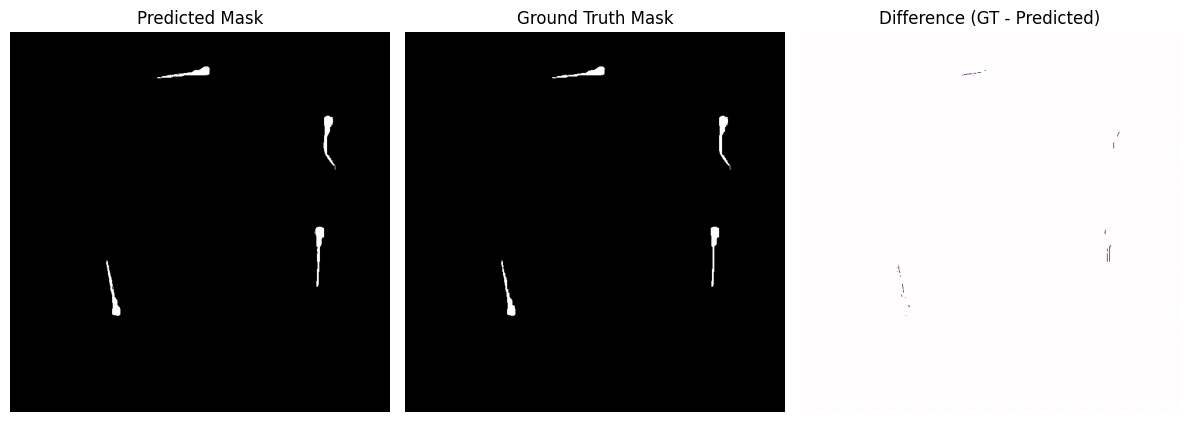

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Paths to the edge-based dataset and ground truth masks
edge_based_test_path = "/content/drive/MyDrive/ensemble_masks/test"
gt_test_path = "/content/drive/MyDrive/yolov11/fish_larvae_GT/test/"

# Define the specific image filename to test
test_image_filename = "01_img19.png"  # Replace with your desired test image filename

# Metric calculation functions
def calculate_iou_segmentation(pred_mask, gt_mask):
    # Intersection over Union (IoU)
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return (intersection / union * 100) if union != 0 else 0

def calculate_dice(pred_mask, gt_mask):
    # Dice Coefficient (F1 Score)
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    return (2 * intersection / (pred_mask.sum() + gt_mask.sum()) * 100) if (pred_mask.sum() + gt_mask.sum()) != 0 else 0

def calculate_pixel_accuracy(pred_mask, gt_mask):
    # Pixel Accuracy
    correct_pixels = (pred_mask == gt_mask).sum()
    total_pixels = gt_mask.size
    return (correct_pixels / total_pixels * 100)

# Load predicted mask
pred_mask_path = os.path.join(edge_based_test_path, test_image_filename)
if not os.path.exists(pred_mask_path):
    print(f"Predicted mask not found: {pred_mask_path}")
else:
    pred_mask = imread(pred_mask_path)
    if pred_mask.ndim == 3:  # Convert RGB to grayscale if needed
        pred_mask = rgb2gray(pred_mask)
    pred_mask = pred_mask > 0.5  # Convert to binary mask

    # Load ground truth mask
    gt_mask_path = os.path.join(gt_test_path, test_image_filename)
    if not os.path.exists(gt_mask_path):
        print(f"Ground truth mask not found: {gt_mask_path}")
    else:
        gt_mask = imread(gt_mask_path)
        if gt_mask.ndim == 3:  # Convert RGB to grayscale if needed
            gt_mask = rgb2gray(gt_mask)
        gt_mask = gt_mask > 0.5  # Convert to binary mask

        # Calculate metrics
        iou = calculate_iou_segmentation(pred_mask, gt_mask)
        dice = calculate_dice(pred_mask, gt_mask)
        pixel_acc = calculate_pixel_accuracy(pred_mask, gt_mask)

        # Display metrics
        print(f"Results for {test_image_filename}:")
        print(f"IoU: {iou:.2f}%")
        print(f"Dice Coefficient: {dice:.2f}%")
        print(f"Pixel Accuracy: {pixel_acc:.2f}%")

        # Plot the masks for visual comparison
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.title("Predicted Mask")
        plt.imshow(pred_mask, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(gt_mask, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Difference (GT - Predicted)")
        plt.imshow(gt_mask.astype(int) - pred_mask.astype(int), cmap='seismic', vmin=-1, vmax=1)
        plt.axis('off')

        plt.tight_layout()
        plt.show()


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray

# Paths to the U-Net segmentation results and ground truth masks
ensemble_segmentation_path = "/content/drive/MyDrive/ensemble_masks/"
gt_path = "/content/drive/MyDrive/yolov11/fish_larvae_GT/"

# Initialize accumulators for metrics
iou_list = []
dice_list = []
pixel_acc_list = []

def calculate_iou_segmentation(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    union = np.logical_or(pred_mask, gt_mask).sum()
    return (intersection / union * 100) if union != 0 else 0

def calculate_dice(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask).sum()
    return (2 * intersection / (pred_mask.sum() + gt_mask.sum()) * 100) if (pred_mask.sum() + gt_mask.sum()) != 0 else 0

def calculate_pixel_accuracy(pred_mask, gt_mask):
    correct_pixels = (pred_mask == gt_mask).sum()
    total_pixels = gt_mask.size
    return (correct_pixels / total_pixels * 100)

def evaluate_segmentation(pred_mask, gt_mask):
    iou = calculate_iou_segmentation(pred_mask, gt_mask)
    dice = calculate_dice(pred_mask, gt_mask)
    pixel_acc = calculate_pixel_accuracy(pred_mask, gt_mask)
    return iou, dice, pixel_acc

# Set the split to "test" only
split = "test"
split_pred_path = os.path.join(ensemble_segmentation_path, split)
split_gt_path = os.path.join(gt_path, split)

if not os.path.exists(split_pred_path):
    print(f"Prediction folder for {split} does not exist.")
else:
    if not os.path.exists(split_gt_path):
        print(f"Ground truth folder for {split} does not exist.")
    else:
        # Loop through all files in the test split
        for filename in os.listdir(split_pred_path):
            if filename.endswith(".png"):  # Ensure the file is a .png mask
                # Predicted mask (U-Net segmentation result)
                pred_mask_path = os.path.join(split_pred_path, filename)
                pred_mask = imread(pred_mask_path)
                if pred_mask.ndim == 3:  # If the mask has 3 channels (RGB)
                    pred_mask = rgb2gray(pred_mask)
                pred_mask = pred_mask > 0.5  # Convert to binary mask

                # Corresponding ground truth mask
                gt_mask_path = os.path.join(split_gt_path, filename)

                if os.path.exists(gt_mask_path):  # Ensure the ground truth mask exists
                    gt_mask = imread(gt_mask_path)
                    if gt_mask.ndim == 3:  # If the mask has 3 channels (RGB)
                        gt_mask = rgb2gray(gt_mask)
                    gt_mask = gt_mask > 0.5  # Convert to binary mask

                    # Evaluate segmentation
                    iou, dice, pixel_acc = evaluate_segmentation(pred_mask, gt_mask)

                    # Store metrics
                    iou_list.append(iou)
                    dice_list.append(dice)
                    pixel_acc_list.append(pixel_acc)
                else:
                    print(f"Ground truth mask not found for: {filename} in {split} split.")

# Calculate and display average metrics
if iou_list:
    avg_iou = np.mean(iou_list)
    avg_dice = np.mean(dice_list)
    avg_pixel_acc = np.mean(pixel_acc_list)

    print(f"Ensembled Segmentation Results (Test Dataset):")
    print(f"Average IoU: {avg_iou:.2f}%")
    print(f"Average Dice Coefficient: {avg_dice:.2f}%")
    print(f"Average Pixel Accuracy: {avg_pixel_acc:.2f}%")
else:
    print("No valid image pairs found for evaluation in the test dataset.")


Ensembled Segmentation Results (Test Dataset):
Average IoU: 81.44%
Average Dice Coefficient: 88.57%
Average Pixel Accuracy: 99.88%
